#ESG in the packaging industry

In this notebook we would like to prove that an high ESG rating for a company in the packaging industry, entails value creation following an M&A transaction. We collect data from Refinitive for batch of companies and we seek to prove, through a Linear Regression model, that thise companies with an high ESG rating score are able to generate more value in M&A transactions.

##Set up of the environment

In [ ]:
from google.colab import drive, files

drive.mount('/content/drive')

!pip install linearmodels
!pip install statsmodels
!pip install seaborn

In [ ]:
## Importing basic libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
## Importing the dataset 
ESG_df = pd.read_excel('/content/drive/MyDrive/progetti_terzi/Aldo_ESG_pack/Data v2.xlsx', sheet_name = 0)
MA_df  = pd.read_excel('/content/drive/MyDrive/progetti_terzi/Aldo_ESG_pack/Data v2.xlsx', sheet_name = 1)

In [ ]:
## Display the data
ESG_df

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,"Revenue from Business Activities - Total\n(FY0, EUR, Ten Million)",TRBC Economic Sector Name,EBITDA Margin - %\nIn the last 12 FY,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NaN,NaN,FY0,FY-1,FY-2,FY-3,...,FY-2,FY-3,FY-4,FY-5,FY-6,FY-7,FY-8,FY-9,FY-10,FY-11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOLMb.ST,Holmen AB,Sweden,Paper Products,189.562098,Basic Materials,0.227784,0.179151,0.156318,0.180442,...,B-,B-,B+,B+,B+,B,B,B,B,B+
3,LUNDb.ST,L E Lundbergforetagen AB (publ),Sweden,Paper Products,241.655424,Basic Materials,0.299291,0.261125,0.256338,0.271675,...,D-,D-,D,D-,D,D-,D-,D-,D-,D-
4,STERV.HE,Stora Enso Oyj,Finland,Paper Products,1016.400000,Basic Materials,0.194412,0.130598,0.135057,0.165268,...,A+,A+,A+,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,4295860207,Nadir Figueiredo SA,Brazil,Non-Paper Containers & Packaging,14.095193,Basic Materials,0.306024,0.212165,0.227661,0.20289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934,4295884210,Kian Joo Can Factory Bhd,Malaysia,Non-Paper Containers & Packaging,38.567703,Basic Materials,0.076473,0.095425,0.132501,0.145656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,5037477699,Lecta SA,Luxembourg,Paper Products,98.313800,Basic Materials,0.023025,0.069055,0.080118,0.083756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,4295886854,Sonae Industria SGPS SA,Portugal,Forest & Wood Products,20.182236,Basic Materials,0.1581,0.085378,0.127368,0.162459,...,D+,C+,C+,C+,C,C,C-,D+,D+,D+


In [ ]:
MA_df

,M&A SDC Deal Number,Date Announced,Rank Date,"Rank Value inc. Net Debt of Target\n(EUR, Millions)",Target Full Name,Target Macro Industry,Target Mid Industry,Target Nation,Acquiror Full Name,Acquiror Macro Industry,...,Defensive Tactics Flag,Deal Type\n('|'),Acquiror Stock Price on Announcement Day\n(USD),Acquiror Stock Price on 1 Day After Announcement\n(USD),Acquiror Stock Price 10 Days After Announcement\n(USD),Acquiror Stock Price 180 Days After Announcement\n(USD),Acquiror Stock Price 1 Week After Announcement\n(USD),Acquiror Stock Price 4 Weeks After Announcement\n(USD),Acquiror Stock Price 60 Days After Announcement\n(USD),Acquiror Stock Price 90 Days After Announcement\n(USD)
0,3870684040,2021-12-30,2021-12-30,0.000000,Volomskii Kompleksnyi Lespromkhoz Leskarel OAO,Materials,Paper & Forest Products,Russia,Renat Rifovich Palatov,Financials,...,False,Stake Purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3890603040,2021-12-27,2021-12-27,111.758531,Shinhan Wallcoverings Co Ltd,Materials,Paper & Forest Products,South Korea,Investor Group,Financials,...,False,Disclosed Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3850589040,2021-12-21,2021-12-21,15.000000,Urban Mining Corp BV,Materials,Containers & Packaging,Netherlands,Investor Group,Financials,...,False,Stake Purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3849139020,2021-12-20,2021-12-20,1201.176000,Ball Metalpack LLC,Materials,Containers & Packaging,United States,Sonoco Products Co,Materials,...,False,Disclosed Value,55.010,56.180,57.710,NaN,57.030,NaN,NaN,NaN
4,3849590040,2021-12-20,2021-12-20,1.095860,TOWING,Materials,Paper & Forest Products,Japan,Investor Group,Financials,...,False,Stake Purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2347125040,2011-01-12,2011-01-12,0.129240,Viky Plastic JSC,Materials,Containers & Packaging,Vietnam,Tran Cam Truoc,Financials,...,False,Stake Purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2809,2268968040,2011-01-07,2011-01-07,0.000000,Dong Hai JSC of Ben Tre,Materials,Paper & Forest Products,Vietnam,Bentre Aquaproduct Import & Export JSC,Consumer Staples,...,False,Stake Purchase,2.193,2.219,2.219,1.862,2.193,2.03,1.776,1.954
2810,2320435040,2011-01-06,2011-01-06,12.500000,Closure Systems International Deutschland GmbH,Materials,Metals & Mining,Germany,Preciosa as,Materials,...,False,Disclosed Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2811,2269237020,2011-01-03,2011-01-03,36.629950,VIOX Corp,Materials,Construction Materials,United States,Ceradyne Inc,Industrials,...,False,Disclosed Value,33.360,31.570,35.530,38.440,36.790,35.43,38.560,47.820


##Preliminary analysis

In this section we are going to understand the nature of the data collected, we will plot the densities and the box plot of each columns data.

The function ```.info()``` allows to grasp a sense of the data that we will deal with. The summary of the data shows that there are 1287 rows and a total of 14 columns however, there are a lot of missing data especially in the ```ESG score``` column where there are more than half missing values for the observations collected. 


In [ ]:
df.describe()

,Year,TOTAL ASSETS,BETA,ESG Score,TQ,CoE,NET SALES OR REVENUES,TOTAL DEBT % TOTAL CAPITAL/STD,VOLATILITY,RETURN ON ASSETS,ICR,MARKET VALUE,MARKET INDEX
count,1287.000000,1.092000e+03,1099.000000,640.000000,1024.000000,1071.000000,1.098000e+03,1096.000000,1102.000000,1069.000000,1068.000000,1104.000000,1287.000000
mean,2016.000000,4.255317e+06,0.708063,51.452719,9.127384,0.054136,3.167372e+05,60.899489,0.275078,5.718503,10.738818,1913.930819,726.599091
std,3.163507,7.305835e+06,0.600107,20.749182,194.925664,0.032606,5.323938e+05,508.429654,0.177605,6.851732,65.869109,3291.454100,110.356570
min,2011.000000,2.145707e+00,-10.150000,3.490000,0.025942,0.000000,0.000000e+00,0.000000,0.000000,-104.290000,-84.969409,0.050961,559.390000
25%,2013.000000,2.959865e+05,0.420000,36.257500,0.801753,0.033217,1.622462e+04,34.875000,0.169250,3.340000,2.516651,152.037793,617.890000
50%,2016.000000,1.662112e+06,0.710000,53.805000,0.898757,0.049251,1.269762e+05,47.215000,0.220350,5.420000,5.300430,684.450000,743.650000
75%,2019.000000,4.858562e+06,0.974200,66.960000,0.993014,0.069851,3.614185e+05,55.535000,0.319150,8.440000,10.000231,2169.904240,797.190000
max,2021.000000,6.497480e+07,5.963000,93.110000,5560.500000,0.354699,4.511648e+06,16869.100000,1.390600,62.420000,1859.000000,31112.470000,941.990000


The function ```.describe()``` implements the summary statistics for the dataframe. We immediately identify outliers, or very unsual observations, in the dataframe. 
* In the column ```BETA``` the min obeservation and max observation are far out from the interquartile range.
* The column ```ESG Score``` has a min observation is much lower than the 25% threashold. It could be an outlier.
* In the column ```TQ``` the standard deviation is enormous, in fact the max observation is 5560.5, which is very weird since Tobin's Q is usually betweem 0 and 2, in fact 75% of the observations are lower than 0.993014. Evidence is supported by the mean which is outside the interquartile range.
* In ```NET SALES OR REVENUES``` the std is very high as well, indicating sparse data however, the min observation is accounted to 0, which is totally plausible for this measure.
* In the column ```TOTAL DEBT % TOTAL CAPITAL/STD``` the max observation is definitely an outlier since the 75% value is 55 and the max is almost 17000. Evidence is supported by the standard deviation as well (508.42) and by the mean which is outside the interquartile range.
* In the column ```RETURN ON ASSETS``` the min and max observations are once more outliers since they are very far apart from tghe interquartile range. 
* In the column ```ICR``` the min observation is negative while the maximum observation is close to 2000, we should check for this column the presence of outliers. 75% of the observations are less than 10.000231 which lead us questioning the nature of the max obeservation.
* Also ```MARKET VALUE``` entails a very high std, following the same reasoning as conducted before, we observe that the max is approximately 31000 while 75% of the obsearvations are lowe than 2169.904240, again brings us questioning the nature of the max observation. 

The ones listed above are the variables collected that present outliers isssue that could bias the result in the panel regression analysis. Most of the time, outliers are miscollected data that could be theoretically replaced by NaN values or by the relative mean of each individuum. For the moment we have grasped a sense of how the dataset looks like, we will deal with outliers in the Data Preprocessing section.

In [ ]:
df.loc[:,'BETA':].corr(method='pearson').style.background_gradient(cmap='Greys')

,BETA,ESG Score,TQ,CoE,NET SALES OR REVENUES,TOTAL DEBT % TOTAL CAPITAL/STD,VOLATILITY,RETURN ON ASSETS,ICR,MARKET VALUE,MARKET INDEX
BETA,1.000000,0.194213,0.002885,0.918777,0.147162,0.038919,0.404164,-0.088328,-0.041622,0.078712,-0.266545
ESG Score,0.194213,1.000000,0.064726,0.071977,0.214828,-0.047483,-0.105088,-0.015796,-0.027108,0.356740,0.056326
TQ,0.002885,0.064726,1.000000,-0.003347,-0.018929,-0.000253,0.003795,-0.455540,0.028346,-0.004698,0.001634
CoE,0.918777,0.071977,-0.003347,1.000000,0.165727,0.045753,0.597406,-0.018962,-0.038200,-0.002071,-0.330778
NET SALES OR REVENUES,0.147162,0.214828,-0.018929,0.165727,1.000000,-0.013142,0.021486,-0.051362,-0.011062,0.700837,0.049023
TOTAL DEBT % TOTAL CAPITAL/STD,0.038919,-0.047483,-0.000253,0.045753,-0.013142,1.000000,0.072931,-0.497188,-0.150550,-0.015290,-0.039530
VOLATILITY,0.404164,-0.105088,0.003795,0.597406,0.021486,0.072931,1.000000,-0.045146,0.056304,-0.112160,-0.382142
RETURN ON ASSETS,-0.088328,-0.015796,-0.455540,-0.018962,-0.051362,-0.497188,-0.045146,1.000000,0.170982,-0.006031,0.098254
ICR,-0.041622,-0.027108,0.028346,-0.038200,-0.011062,-0.150550,0.056304,0.170982,1.000000,-0.002786,0.079641
MARKET VALUE,0.078712,0.356740,-0.004698,-0.002071,0.700837,-0.015290,-0.112160,-0.006031,-0.002786,1.000000,0.079881


The correlation function allows a precise visualization of the correlations among the columns in the dataset. There are positive and negative correlated features, with different degrees of correlation. The independent varibale of the analysis is ESG Score which is positively correlated with Tobin's Q and COst of Equity, the two main dependent varibales that will be used for the regression analysis.

## Data Preprocessing

###Remove rows with missing values

Since the data contains several missing entries, especially in the main independent variable ESG score, we believe it is convenient to drop the missing values entries since replacement would be meaningless. Essentially there would be too much data to artificially replace and the analysis would just be indequate.

In [ ]:
df_dropna = df.dropna(how='any')

In [ ]:
df_dropna.describe()

,Year,TOTAL ASSETS,BETA,ESG Score,TQ,CoE,NET SALES OR REVENUES,TOTAL DEBT % TOTAL CAPITAL/STD,VOLATILITY,RETURN ON ASSETS,ICR,MARKET VALUE,MARKET INDEX
count,608.00000,6.080000e+02,608.000000,608.000000,608.000000,608.000000,6.080000e+02,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,2016.65625,5.887898e+06,0.770970,52.309901,0.893514,0.055780,4.017403e+05,42.535707,0.259696,5.526530,7.382381,2477.715684,752.400905
std,2.92497,9.126341e+06,0.438531,20.490429,0.180136,0.033351,6.156259e+05,13.666332,0.162624,5.613127,9.283990,3812.835821,99.181090
min,2011.00000,1.016373e+04,-0.050000,7.240000,0.234488,0.000189,1.076310e+00,0.000000,0.000000,-23.670000,-28.609244,2.598656,559.390000
25%,2014.00000,3.440889e+05,0.468625,37.480000,0.802901,0.034842,1.668119e+04,32.820000,0.171900,2.890000,2.901654,212.911672,700.680000
50%,2017.00000,2.465918e+06,0.740000,54.230000,0.898355,0.050599,1.796330e+05,43.940000,0.208250,5.345000,5.608979,1016.405000,773.840000
75%,2019.00000,7.580172e+06,0.990000,67.802500,0.983631,0.071416,5.278981e+05,52.342500,0.285650,8.375000,10.396165,3106.413567,797.190000
max,2021.00000,6.497480e+07,4.914400,93.110000,2.018766,0.333872,4.511648e+06,79.950000,1.349600,32.850000,85.004769,28371.760000,941.990000


The dimension of the dataset ```data_dropna``` has reduced significantly, more than 50% (count=608) of the collected observations are deleted following this procedure. Nonetheless, we are sure to work with the true data and not with estimates of the missing ones. Moreover, some outliers identified in the first sight of the data were removed nonetheless there still are relative concerns relative to ```BETA```, ```ESG Score```, ```ICR``` and ```MARKET VALUE```.





###Visualization of the main relationships

We are going to scatter plot the relationship between the main variable of interest for the analysis. We first plot the relationship between ```ESG score``` and ```TQ``` subsequently, we are going to plot the realtionship between ```ESG Score``` and ```CoE```. This is done to visually grasp the sense of the statistical relationship between the variables of interest. Since there are many datapoints relative to several individuums, we are not going to plot with different colors eacah individuum, rather we adopt a density style plot tha is able to show the regions of higher density.

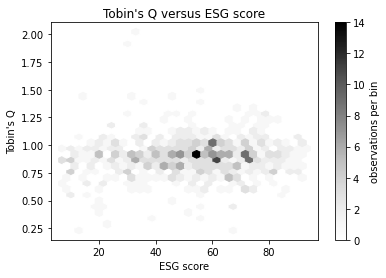

In [ ]:
x = df_dropna['ESG Score']
y = df_dropna['TQ']

## use the hexbin plot to represent the density of the observations in the plane
plt.hexbin(x, y, gridsize=30,
           cmap='Greys')
plt.xlabel('ESG score')
plt.ylabel("Tobin's Q")
plt.title("Tobin's Q versus ESG score")
plt.colorbar(label='observations per bin')
plt.savefig('/content/drive/MyDrive/ESG_lin_reg/Plots/TQ_vs_ESG', dpi=1000)

There is a visible trend that do not suggest a strong linear relationship but rather a constant one betweem ESG Score and Tobin's Q, meaning that at higher ESG score, the Tobin's Q isn't high as well.

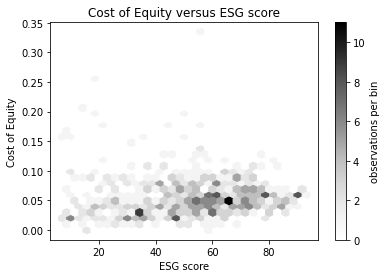

In [ ]:
x = df_dropna['ESG Score']
y = df_dropna['CoE']

## use the hexbin plot to represent the density of the observations in the plane
plt.hexbin(x, y, gridsize=30,
           cmap='Greys')
plt.xlabel('ESG score')
plt.ylabel("Cost of Equity")
plt.title("Cost of Equity versus ESG score")
plt.colorbar(label='observations per bin')
plt.savefig('/content/drive/MyDrive/ESG_lin_reg/Plots/CoE_vs_ESG', dpi=1000)

In the second scatterplot, we visually experience a slight positve linear relationship between ESG Score and Cost of Equity.

###Data Manipulation

As shown in previous papers, we are going to manipulate the dataset in order to have the natural logarithm of the Tobin's Q, Cost of Equity and Total Assets. We are going to concatenate columns to the dataframe leaving the original data untouched and the new ones in a specific column.

In [ ]:
df_dropna['ln_TQ'] = np.log(df_dropna['TQ'])
df_dropna['ln_CoE'] = np.log(df_dropna['CoE'])
df_dropna['ln_TOTAL ASSETS'] = np.log(df_dropna['TOTAL ASSETS'])

We are going to plot again the relationship between the main variable of interst updated in their logarithmic form.

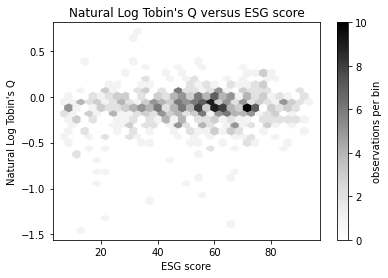

In [ ]:
x = df_dropna['ESG Score']
y = df_dropna['ln_TQ']

## use the hexbin plot to represent the density of the observations in the plane
plt.hexbin(x, y, gridsize=30,
           cmap='Greys')
plt.xlabel('ESG score')
plt.ylabel("Natural Log Tobin's Q")
plt.title("Natural Log Tobin's Q versus ESG score")
plt.colorbar(label='observations per bin')
plt.savefig('/content/drive/MyDrive/ESG_lin_reg/Plots/ln_TQ_vs_ESG', dpi=1000)

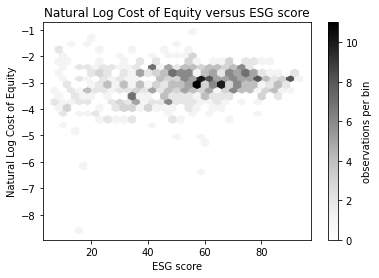

In [ ]:
x = df_dropna['ESG Score']
y = df_dropna['ln_CoE']

## use the hexbin plot to represent the density of the observations in the plane
plt.hexbin(x, y, gridsize=30,
           cmap='Greys')
plt.xlabel('ESG score')
plt.ylabel("Natural Log Cost of Equity")
plt.title("Natural Log Cost of Equity versus ESG score")
plt.colorbar(label='observations per bin')
plt.savefig('/content/drive/MyDrive/ESG_lin_reg/Plots/ln_CoE_vs_ESG', dpi=1000)

##Regression Analysis

We start now with the main regression analysis following the standard statistical procedure...

###Tobin's Q vs ESG Score analysis

#### PooledOLS Model

We start with the PooledOLS for that can be described as simple OLS (Ordinary Least Squared) model. It ignores time and individual characteristics and focuses only on dependencies between the individuums. However, there are strict assumptions that we have to bear in mind when dealing with OLS, out of the five assumptions that are required to develop OLS models, assumption 2 and 3 must necessarly hold:
* 2) **Exogeneity**, there is no correlation between independent variables and IVs
* 3a) **Homoskedasticity**, the variance of the error term must be equal across the independent variables. 
* 3b) **No-autocorrelation**, the coviarance between different error terms must be equal to zero.

In [ ]:
## Very Important line of code, set Year in datetime and set Year as index of df

## Convert the year column in python datatime format
df_dropna['Year'] = pd.to_datetime(df_dropna['Year'], format='%Y')

## Add column year to index
df_dropna=df_dropna.set_index('Year', append=True)

## Companies to categorical variable
df_dropna['Company'] = pd.Categorical(df_dropna['Company'])

In [ ]:
df_dropna.to_stata('/content/drive/MyDrive/ESG_lin_reg/dataset_stata.dta')

In [ ]:
## Import statistical library to perform OLS analysis
from linearmodels import PooledOLS
import statsmodels.api as sm

## Store the exogenous (x) and endogenous (y) variable
## we add the constant term, it can be proved that the OLS result is enhanced with the consant term in x
x = sm.tools.tools.add_constant(pd.concat([df_dropna['ESG Score'],
                                           df_dropna['NET SALES OR REVENUES'],
                                           df_dropna['TOTAL DEBT % TOTAL CAPITAL/STD'],
                                           df_dropna['VOLATILITY'],
                                           df_dropna['ln_CoE'],
                                           df_dropna['ln_TOTAL ASSETS'],
                                           df_dropna['MARKET VALUE'],
                                           df_dropna['MARKET INDEX']], axis=1 ))
y = df_dropna['ln_TQ']

## Create and fit the residualas of the PooledOLS models
model = PooledOLS(y, x)
pooledOLS_res = model.fit(cov_type='clustered', cluster_entity=True)

## Store the values of the residual in order to check for homoskedasticity
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [ ]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  ln_TQ   R-squared:                        0.2552
Estimator:                  PooledOLS   R-squared (Between):              0.2552
No. Observations:                 608   R-squared (Within):               0.0000
Date:                Fri, Feb 18 2022   R-squared (Overall):              0.2552
Time:                        09:06:03   Log-likelihood                    148.60
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      25.656
Entities:                         608   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                   F(8,599)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             9.3474
                            

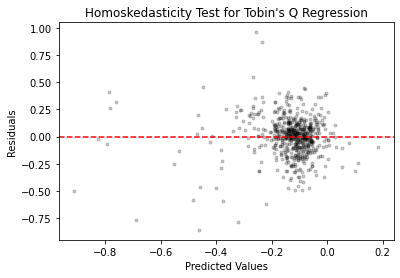

In [ ]:
## Check for Homoskedasticity graphically

fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, marker='.',c='black', alpha=0.2)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title("Homoskedasticity Test for Tobin's Q Regression")
plt.savefig('/content/drive/MyDrive/ESG_lin_reg/Plots/homoskedasticity_test_TQ', dpi=1000)

In [ ]:
## Implementation of White & Breush-Pagan Test for Homoskedasticity

## Import the White and Breush-Pagan tests
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_df = pd.concat([df_dropna, residuals_pooled_OLS], axis=1)
x = sm.tools.tools.add_constant(df_dropna['ESG Score'])

## Perform White-test
white_test_results = het_white(pooled_OLS_df['residual'], x)

labels_w = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(f"The result of the White Test is: {dict(zip(labels_w, white_test_results))}")

## Perform Breush-Pagan Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_df['residual'], x)

labels_bp = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(f"The result of the Breush-Pagan Test is: {dict(zip(labels_bp, breusch_pagan_test_results))}")

The result of the White Test is: {'LM-Stat': 5.888017532590599, 'LM p-val': 0.05265422660136687, 'F-Stat': 2.9581296427779855, 'F p-val': 0.05266734989404886}
The result of the Breush-Pagan Test is: {'LM-Stat': 5.0454609933213455, 'LM p-val': 0.024690536795970632, 'F-Stat': 5.070945094782433, 'F p-val': 0.02468735578097719}


In [ ]:
## Implementation of the Durbin-Watson Test for Non-Autocorrelation

## Import the Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_df['residual'])
print(f"The result of the Durbin-Watson Test is: {durbin_watson_test_results}")

The result of the Durbin-Watson Test is: 0.8583849693759444


###CoE vs ESG Score Analysis

####PooledOLS Model

In [ ]:
## Import statistical library to perform OLS analysis
from linearmodels import PooledOLS
import statsmodels.api as sm

## Store the exogenous (x) and endogenous (y) variable
## we add the constant term, it can be proved that the OLS result is enhanced with the consant term in x
x = sm.tools.tools.add_constant(pd.concat([df_dropna['ESG Score'],
                                           df_dropna['NET SALES OR REVENUES'],
                                           #df_dropna['TOTAL DEBT % TOTAL CAPITAL/STD'],
                                           df_dropna['VOLATILITY'],
                                           df_dropna['RETURN ON ASSETS'],
                                           df_dropna['ln_TQ'],
                                           #df_dropna['ln_TOTAL ASSETS'],
                                           df_dropna['BETA']], axis=1 ))
y = df_dropna['ln_CoE']

## Create and fit the residualas of the PooledOLS models
model = PooledOLS(y, x)
pooledOLS_res = model.fit(cov_type='clustered', cluster_entity=True)

## Store the values of the residual in order to check for homoskedasticity
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [ ]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 ln_CoE   R-squared:                        0.6941
Estimator:                  PooledOLS   R-squared (Between):              0.6941
No. Observations:                 608   R-squared (Within):               0.0000
Date:                Fri, Feb 18 2022   R-squared (Overall):              0.6941
Time:                        09:06:38   Log-likelihood                   -235.68
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      227.33
Entities:                         608   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                   F(6,601)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             88.034
                            

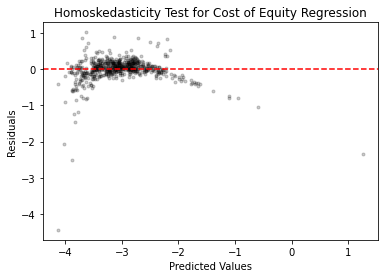

In [ ]:
## Check for Homoskedasticity graphically

fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, marker='.',c='black', alpha=0.2)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title("Homoskedasticity Test for Cost of Equity Regression")
plt.savefig('/content/drive/MyDrive/ESG_lin_reg/Plots/homoskedasticity_test_CoE', dpi=1000)

In [ ]:
## Implementation of White & Breush-Pagan Test for Homoskedasticity

## Import the White and Breush-Pagan tests
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_df = pd.concat([df_dropna, residuals_pooled_OLS], axis=1)
x = sm.tools.tools.add_constant(df_dropna['ESG Score'])

## Perform White-test
white_test_results = het_white(pooled_OLS_df['residual'], x)

labels_w = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(f"The result of the White Test is: {dict(zip(labels_w, white_test_results))}")

## Perform Breush-Pagan Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_df['residual'], x)

labels_bp = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(f"The result of the Breush-Pagan Test is: {dict(zip(labels_bp, breusch_pagan_test_results))}")

The result of the White Test is: {'LM-Stat': 8.510522063085858, 'LM p-val': 0.014189386384699977, 'F-Stat': 4.294375495868814, 'F p-val': 0.014063410382428573}
The result of the Breush-Pagan Test is: {'LM-Stat': 7.275774540024752, 'LM p-val': 0.006989074932678043, 'F-Stat': 7.339672988681175, 'F p-val': 0.006935607958672194}


In [ ]:
## Implementation of the Durbin-Watson Test for Non-Autocorrelation

## Import the Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_df['residual'])
print(f"The result of the Durbin-Watson Test is: {durbin_watson_test_results}")

The result of the Durbin-Watson Test is: 1.3014320071658645
